In [1]:
import cv2
import numpy as np
import glob
import tqdm
from cv2 import VideoWriter, VideoWriter_fourcc
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os


def visualize_waves(
        waves, output_path="C:\\Users\\Wojtek\\Documents\\Doktorat\\AstrocyteCalciumWaveDetector\\debug",
        filename='waves.mp4'):

    ims = []

    fig = plt.figure()

    for i in tqdm.trange(waves.shape[2]):
        im = plt.imshow(waves[:, :, i], animated=True, cmap='gray', vmin=0, vmax=255)
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                    repeat_delay=1000)

    ani.save(os.path.join(output_path, filename))

In [6]:
p = r'F:\Astral\backup\Cont_AA_2_1\timespace.npy'
waves = np.load(p)

100%|█████████████████████████████████████████████████████████████████████████████| 1200/1200 [00:09<00:00, 124.58it/s]


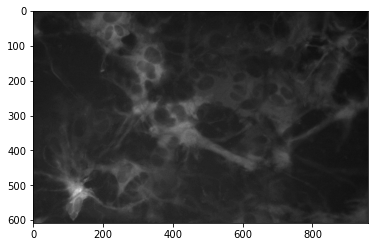

In [8]:
visualize_waves(
        waves, output_path=r"F:\Astral\backup\Cont_AA_2_1",
        filename='waves.mp4')

In [9]:
def create_timespace_wave_video(waves, timespace, output_video_path, filename):

    if isinstance(waves, str):
        waves = np.load(waves)
        waves = waves.astype('uint8')
        waves[waves > 0] = 255
    elif waves is not np.ndarray:
        print("Error with argument waves")
    if isinstance(timespace, str):
        timespace = np.load(timespace)
    elif timespace is not np.ndarray:
        print("Error with argument timespace")

    output_sequence = np.concatenate((timespace, waves), axis=0)

    ims = []

    fig = plt.figure()

    for i in tqdm.trange(output_sequence.shape[2]):
        im = plt.imshow(output_sequence[:, :, i], animated=True, cmap='gray', vmin=0, vmax=255)
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                    repeat_delay=1000)

    ani.save(os.path.join(output_video_path, filename))

In [86]:
p1 = r'F:\Astral\backup\Cont_AA_2_1\timespace.npy'
timespace = np.load(p1)

p2 = r'F:\Astral\backup\Cont_AA_2_1\waves_morph.npy'
waves = np.load(p2)

waves = waves.astype(np.uint8)
waves[waves==1] = 255

In [19]:
np.unique(waves)

array([  0, 255], dtype=uint8)

Error with argument waves
Error with argument timespace


100%|██████████████████████████████████████████████████████████████████████████████| 1200/1200 [00:19<00:00, 61.45it/s]


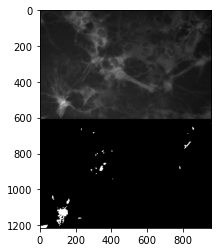

In [20]:
create_timespace_wave_video(waves, timespace, r'F:\Astral\backup\Cont_AA_2_1', 'timespace_with_waves.mp4')

In [153]:
i = 724

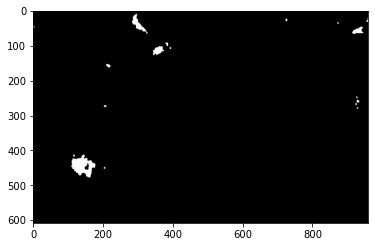

In [160]:
plt.imshow(waves[:, :, i], cmap='gray')

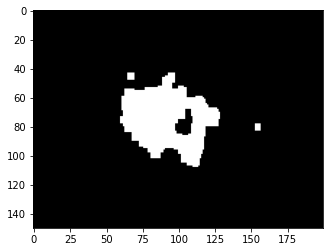

In [161]:
plt.imshow(waves[370:520, 50:250, i], cmap='gray')

In [162]:
one_shape = waves[370:520, 50:250, 700:740]

100%|████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 1024.71it/s]


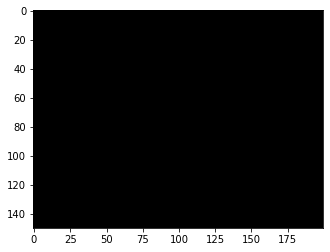

In [163]:
visualize_waves(
        one_shape, output_path=r"F:\Astral\backup\Cont_AA_2_1",
        filename='one_shape.mp4')

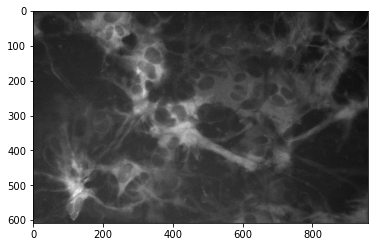

In [96]:
plt.imshow(timespace[:, :, i], cmap='gray')

In [97]:
w_ex = waves[:,:, i].copy().astype(np.uint16)
t_ex = timespace[:,:, i].copy().astype(np.uint16)

res = w_ex + t_ex

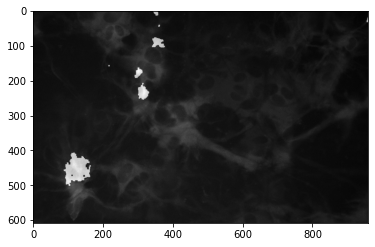

In [98]:
plt.imshow(res, cmap='gray')

In [99]:
res2 = t_ex.copy()
res2[w_ex==0] = 0

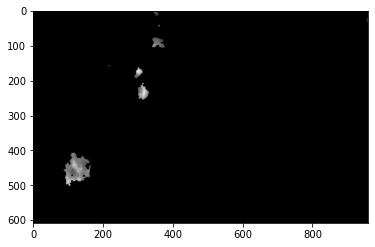

In [100]:
plt.imshow(res2, cmap='gray')

In [169]:
d1 = r'C:\Users\Wojtek\Documents\Doktorat\Astral\data\Cont_AA_1_2\segmentation_dims.h5'

import pandas as pd

In [170]:
seg = pd.read_hdf(d1)

In [171]:
seg

,id,y_min,y_max,x_min,x_max,z_min,z_max,center_y,center_x,center_z
0,0,321,527,670,872,517,614,424,771,565
1,1,4,356,175,463,1009,1148,180,319,1078
2,2,226,371,273,440,1151,1199,298,356,1175
3,3,99,282,413,567,552,594,190,490,573
4,4,0,126,72,217,586,617,63,144,601
...,...,...,...,...,...,...,...,...,...,...
515,515,424,442,571,578,1035,1037,433,574,1036
516,516,329,345,241,246,1190,1193,337,243,1191
517,517,290,310,581,594,422,423,300,587,422
518,518,170,185,954,959,958,967,177,956,962
